In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import PowerTransformer

In [2]:
path = 'D://DS//Stater_Projects//car_insurance_payout.txt'

In [3]:
df = pd.read_csv(path, header = None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       63 non-null     int64  
 1   1       63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [5]:
df.shape

(63, 2)

In [6]:
df.describe()

,0,1
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


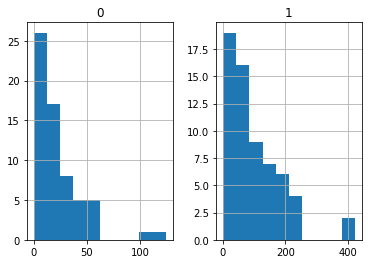

In [7]:
df.hist()
plt.show()

In [8]:
df = df.values

In [9]:
features, target = df[:, :-1], df[:, -1]

In [10]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.33,random_state=12345)

In [11]:
target_train, target_test = target_train.reshape((len(target_train),1)), target_test.reshape((len(target_test),1))

In [12]:
power1 = PowerTransformer()
power1.fit(features_train)
features_train = power1.transform(features_train)
features_test = power1.transform(features_test)

In [13]:
power2 = PowerTransformer()
power2.fit(target_train)
target_train = power1.transform(target_train)
target_test = power1.transform(target_test)

In [14]:
n_features = features.shape[1]

In [15]:
model = Sequential()
model.add(Dense(50, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(10, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

In [16]:
model.compile(optimizer='adam', loss='mse')

In [17]:
history = model.fit(features_train, target_train, epochs=250, batch_size=8, verbose=0, validation_data=(features_test,target_test))

In [18]:
pred = model.predict(features_test)

In [19]:
target_test = power2.inverse_transform(target_test)
pred = power2.inverse_transform(pred)

In [20]:
score = mean_absolute_error(target_test, pred)
print('MAE: %.3f' % score)

MAE: 81.716


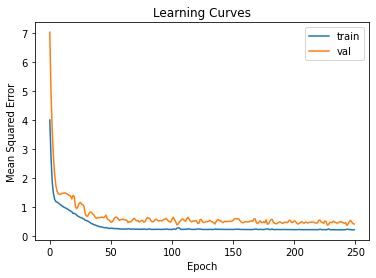

In [21]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [22]:
model.fit(features, target, epochs=200, batch_size=8, verbose=0)

In [24]:
trial = [13]
features_new = power1.transform([trial])
pred = model.predict(features_new)
pred = power2.inverse_transform(pred)
print('f(%s) = %.3f' % (trial, pred[0]))

f([13]) = 2552.927
